
# SVM



In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Mar  8 11:53:08 2020

@author: yosi
"""

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression,Ridge, LogisticRegression
import math
from scipy.special import expit
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
table = pd.read_csv('/content/gdrive/MyDrive/Machon Lev/ML_5783/Materials/Intel-ML101-Class4/data/weight-height.csv')
table['Gender'].replace(['Female','Male'],[0,1],inplace=True)
X = table[['Height','Weight']]
y = table['Gender']
#normalize X
X = (X-np.mean(X))/np.std(X)
X = X.values
y = y.values



#EDA
print(np.corrcoef(X[:,0],X[:,1]))
print(np.corrcoef(X[:,0],y))
print(np.corrcoef(X[:,1],y))


#both height and weight correlate positive with gender and are very correlated
#weight is more important
#when combined the height weight has negative value because they are correlated
 

[[1.        0.9247563]
 [0.9247563 1.       ]]
[[1.         0.69107204]
 [0.69107204 1.        ]]
[[1.         0.79672335]
 [0.79672335 1.        ]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#try with skleaarn logistic classifier
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_ = clf.predict(X_test)
score = clf.score(X_test,y_test)
print('score = ',score)
print('weights = ',clf.coef_)

score =  0.9206060606060606
weights =  [[-1.8341555   6.16417939]]


In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='linear',cache_size=300)
clf.fit(X_train, y_train)
score = clf.score(X_test,y_test)
print('score = ',score)
print(clf.coef_)

score =  0.9203030303030303
[[-1.19170907  4.0438776 ]]


## Differences between logistic regression and SVM loss. not vectorized, too slow, just for explanation

In [ ]:
#svm primal formulation: implementation from scratch

def hinge_loss(w,x,y,reg):
    """ evaluates hinge loss and its gradient at w
    rows of x are data points
    y is a vector of labels
    """
    loss,grad = 0,0
    for (x_,y_) in zip(x,y):
#y_pred = np.dot(w,x_) is the output of the classifier and y_ is the true label: {-1,1}
        y_pred = np.dot(w,x_)
        y_loss = y_*y_pred
        loss += max(0,1-y_loss)
#########################################
#Example: not part of the code
####
#suppose w*x_=3,y_=1 => y_loss = 3 , loss = 0 (positive example with high positive prediction)
#suppose w*x_=0.5,y_=1 => y_loss = 0.5 , loss = 0.5  (positive example with low positive prediction)
#suppose w*x_=3,y_=-1 => y_loss = -3 , loss = 4  (negative example with high positive prediction)
####################################        
    grad += 0 if y_loss > 1 else -y_*x_
    loss /= x.shape[0]
    grad /= x.shape[0]
    # Regularize
    loss += 0.5 * reg * np.sum(w * w)
    grad += reg*w
    return (loss,grad)

def logistic_loss(w,x,y,reg):
    """ evaluates hinge loss and its gradient at w
    rows of x are data points
    y is a vector of labels
    """
    loss,grad = 0,0
    for (x_,y_) in zip(x,y):
        y_pred = expit(np.dot(w,x_))
        loss += -(y_*np.log(y_pred)+(1-y_)*np.log(1 - y_pred))
        grad += 2*x_*(y_pred - y_)
    loss /= x.shape[0]
    grad /= x.shape[0]
    # Regularize
    loss += reg * np.sum(w * w)
    grad += reg*w
    return (loss,grad)

def GDS(X, y, num_steps, learning_rate):
    cost = []
    #We won't use intercept here (we suppose mean(y)=0)   
    weights = np.zeros(X.shape[1])
    reg = 0
    
    for step in range(num_steps):
        #loss,grad = logistic_loss(weights,X,y,reg)
        loss,grad = hinge_loss(weights,X,y,reg)
        weights += - learning_rate * grad
        cost.append(loss)
    return weights,cost

## Play with regularization and check seprating hyperplane
## A low C makes the decision surface smooth (high regul.) , while a high C aims at classifying all training examples (low regul.)

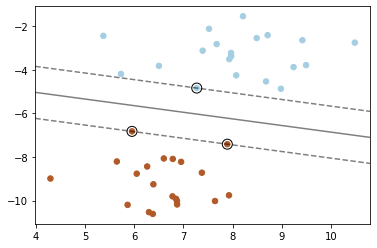

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

#X, y = X_train[:200], y_train[:200]

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1110)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

## compare SVM and logistic regression regularization
## for log. reg., C = Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
## (but for linear regression alpha is the regularization strength)

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

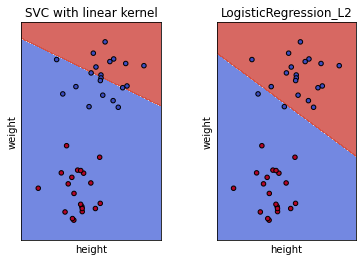

In [ ]:
# title for the plots
titles = ('SVC with linear kernel',
          'LogisticRegression_L2')
C = 0.001

models = (svm.SVC(kernel='linear',C=C),
          LogisticRegression(penalty='l2',C=C,random_state=0))
models = (clf.fit(X_train, y_train) for clf in models)

fig, sub = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('height')
    ax.set_ylabel('weight')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()